# Data Science Project: Social Media Mood Predictions and Analysis


Individual project completed by Ben Beattie

---
In this Project, we will be analysing the impact social media usage has on the dominate emotions of individuals. It explores the relationship between social media usage and the dominate emtional state of individuals based upon their online activities. The data explores a wide range of different social media users of different genders, ages, social media platforms and usage levels. This investigation hopes to uncover a correlation between different social media usage levels and different emotions individuals may face and wheter these emotions are related to the usage of social media. The data is first explored through the data preporation and exploration stage, with the clean prepared data then being used to explore knn and decision tree machine learning to attempt to create a model which can predict a social medias users dominate emotion based on their social media usage patterns and habits.

This Project uses and analyses data provided from AI Inventor Emirhan Bulut on Kaggle.com. The original dataset can be obtained from https://www.kaggle.com/datasets/emirhanai/social-media-usage-and-emotional-well-being. It captures valuable information on social media usage and the dominant emotional state of users based on their activities. The dataset is ideal for exploring the relationship between social media usage patterns and emotional well-being. The original dataset is split into train and test datasets, however for the purpose of this project, these two datasets have been combined and then later split into train and testing datasets for original test/train splitting for creating predictive models. The data covers 1000 social media users from a range of different ages, genders, social media platforms, all with different social media usage levels.

---

## Data exploration and preparation

In this section the data has been prepared and explored to uncover any potential correlation between social media usage and dominate emotions felt by social media users. In the SMMood_predictor file, both the test and training set have been combined into one dataset, to be later spilt into new test and training sets when working with the machine learning models. As can be seen all along, the data contains a number of different features including 'User_ID', 'Age', 'Gender', 'Platform', 'Daily Usage Time (Minutes)', 'Posts Per Day', 'Likes Recieved Per Day', 'Comments Recieved Per Day, 'Messages Sent Per Day' and 'Dominant Emotion'. Below is the head of our dataframe.

It is also important that the correct librabries are imported throughout the project, here the pandas library is imported. We can also see below that our data is in the correct form to allow for exploration, as well as the dataset having no missing values.

In [7]:
#Importing libraries
import pandas as pd

In [8]:
#Reading csv file to import data into dataframe
df = pd.read_csv("SMMOOD.csv")
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4.0,40.0,18.0,22.0,Neutral
1,488,21,Non-binary,Snapchat,60,1.0,18.0,7.0,12.0,Neutral
2,776,28,Non-binary,Snapchat,115,3.0,38.0,18.0,27.0,Anxiety
3,869,27,Male,Telegram,105,3.0,48.0,20.0,28.0,Anxiety
4,573,21,Non-binary,Facebook,55,3.0,17.0,7.0,12.0,Neutral


In [9]:
#Outputting the different types of data
df.dtypes

User_ID                         int64
Age                             int64
Gender                         object
Platform                       object
Daily_Usage_Time (minutes)      int64
Posts_Per_Day                 float64
Likes_Received_Per_Day        float64
Comments_Received_Per_Day     float64
Messages_Sent_Per_Day         float64
Dominant_Emotion               object
dtype: object

In [10]:
#checking to see if any null values in the data
df.isna().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64


 
The visual below depicts the age distribution of those social media users included in the data. The average social media user in the dataset was just below 27.5 years, with a median age of 27 years old and range of 14 years. 

In [13]:
#Importing libraries
import matplotlib.pyplot as plt

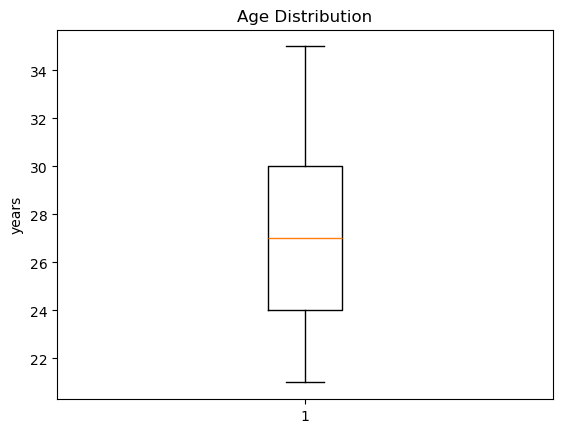

In [14]:
#Creating a box plot for age distribution of the data
plt.boxplot(df['Age'])
plt.ylabel('years')
plt.title('Age Distribution')
plt.show()

This table of varius boxplots analyses the dominant emotions of individuals in the dataset grouped by their age. From the boxplot, it is evident that the range of ages for the different dominant emotions is consistent, with a majority of emotions being present in almost all the age groups. Every dominant emotion except for neutral have an average of age between 26 and 29, with neutral sitting lower at an average of 23 years of age. The skew on the anger emotion is slightly skewed to the right, with sadness also being slight right skewed, whilst happiness and boredom is right-skewed. These right-skewed distributions suggest that the ages of those who have such dominant emotions tends to be lower. The emotion of Anxeity is slightly skewed to the left suggesting that the average age is slightly higher, whilst also having an outlier at age 35. Happiness follows a symmetric distribution.

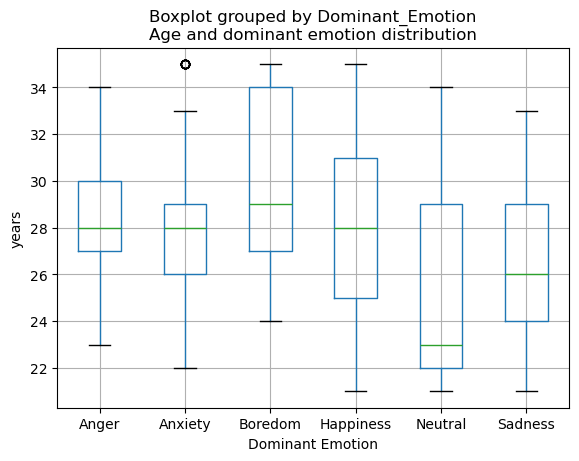

In [17]:
#Creating a box plot for age distribution of the data, grouped by the dominant emotions
df.boxplot(column='Age', by='Dominant_Emotion')
plt.ylabel('years')
plt.xlabel('Dominant Emotion')
plt.title('Age and dominant emotion distribution')
plt.show()

This pie chart depicts the dominante emotion reported by social media users in the datset. All emotions were similarily described, with only a 7.9% difference between the most common dominant emotion of neutral and the least common dominate emotion of Anger. These emotions were reported by 20.5% and 12.6% respectively of users. Happiness was the second most common emotion being reported by 19.4% of users, followed by anxiety (17.4%), Sadness (15.8%) and boredom (14.2%).

In [20]:
#Value count for all of the dominant emotions to be used in pie chart
vc = df['Dominant_Emotion'].value_counts()

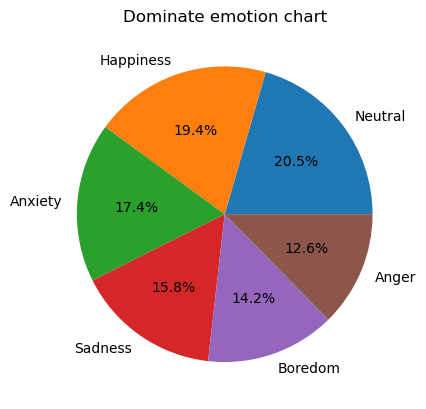

In [21]:
#Creating a pie chart to display dominant emotions in data by percentage
plt.pie(vc, labels=vc.index, autopct='%1.1f%%')
plt.title('Dominate emotion chart')
plt.show()

The following Boxplots demonstrate daily social media usage in minutes grouped by gender. On average, it was found that Females use social media for longer periods of time than Males and Non-binary users. Females had an average social media daily usage of just above 100 minutes per day, whilst Males had an average time of just above 80 minutes, followed by Non-binary users at an average time of just over 70 minutes per day. Male and Non-binary users also had outliers, with Males having 3 outliers between 160-180 minutes per day, and Non-binary users having an outlier of around 190 minutes per day. Female users had the greatest range of social media usage times with a range of over 140 minutes.

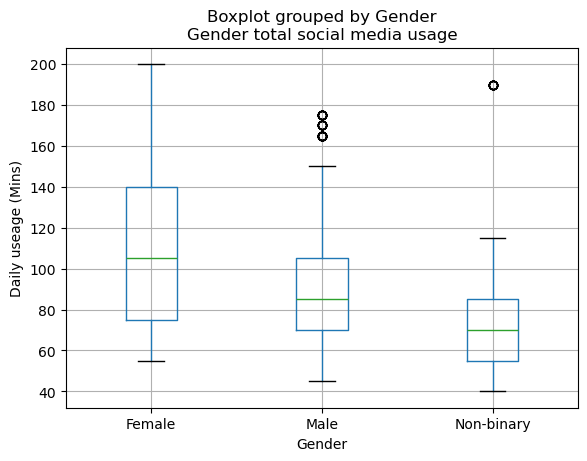

In [24]:
#Creating a box plot for Daily usage time distribution, grouped by Gender
df.boxplot(column='Daily_Usage_Time (minutes)', by='Gender')
plt.ylabel('Daily useage (Mins)')
plt.xlabel('Gender')
plt.title('Gender total social media usage')
plt.show()

This pie chart explores the different social media platform utilised by social media users. The most popular social media platform was instagram at 24.1%, followed by twitter and facebook on 19.9% and 19.5% respectively. LinkedIn has a 12.3% usage, with Snapchat, Telegram and Whatapp towards the lower end of usage in the dataset, woth 8.4%, 8.3% and 7.5% usage. 

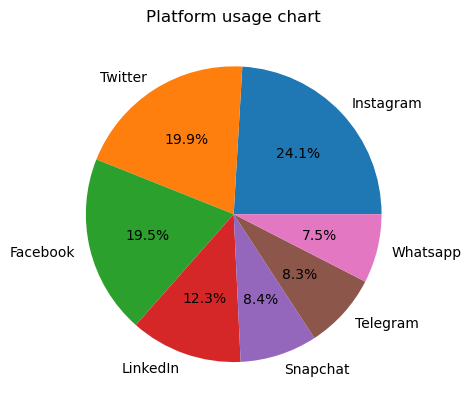

In [27]:
#Getting value counts of each social media platform to be used in piechart
mediaCount = df['Platform'].value_counts()

#Creating Pie chart to display social media platform percentages.
plt.pie(mediaCount, labels=mediaCount.index, autopct='%1.1f%%')
plt.title('Platform usage chart')
plt.show()

This scatterplot explores the correlation between daily social media usage in minutes and the number of messages sent per day. The correlation coefficent between these two features was 0.91, and pairing this with the scatter plot, a strong positive linear relationship between these two features is evident.

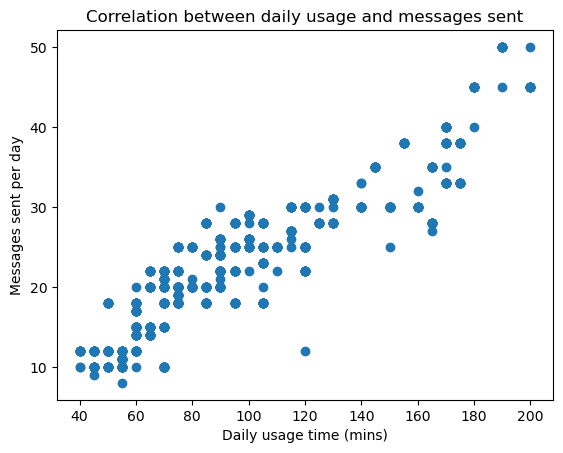

In [30]:
#Creating a scatter plot to describe the correlation between daily usage time and messages sent per day
plt.scatter(df['Daily_Usage_Time (minutes)'], df['Messages_Sent_Per_Day'])
plt.title('Correlation between daily usage and messages sent')
plt.xlabel('Daily usage time (mins)')
plt.ylabel('Messages sent per day')
plt.show()

In [31]:
#Finding correlation coefficent
df['Daily_Usage_Time (minutes)'].corr(df['Messages_Sent_Per_Day'])

0.913488010238172

The following bar chart is of the number of messages sent per day by social media users, by the social media platform on which they were sent. A majority of the social media platforms fall between 20 and 30 messages sent per day, with Instagram users sending the most messages per day at around 50 messages per day. LinkedIn had the lowest messages sent per day at an average of just below 20 messages per day.

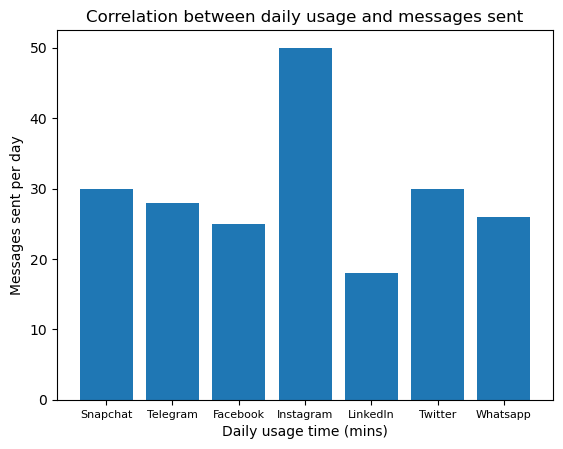

In [34]:
#Creating a bar chart for the number of messages sent per day by social media platform
plt.bar(df['Platform'],df['Messages_Sent_Per_Day'])
plt.title('Correlation between daily usage and messages sent')
plt.xlabel('Daily usage time (mins)')
plt.ylabel('Messages sent per day')
plt.xticks(fontsize=8)
plt.show()

The following diagram detials the distribtuion of daily social media usage time in minutes, grouped by dominant emotions of social media users. The usage time for each of the dominant emotions are different skewed. At first glance, it was interesting to note that the dominant emotion of happiness saw the highest mean daily usage time at an average of just over 150 minutes per day. The dominant emotion group which saw the lowest mean daily usage time was boredom with an average of 60 minutes per day on social media. The dominant emotions of anger was right-skewed, with an outlier at 60 minutes per day of social media usage. The dominant emotion of anxiety was also of a right-skew with an outlier at 200 minutes per day, Boredom also had a right-skewing. Happinees and sadness were both left-skewed with outliers of just below 90 minutes per day for happiness and 130 minutes per day for neutral emotions. Sadness was also distirbuted to the left.

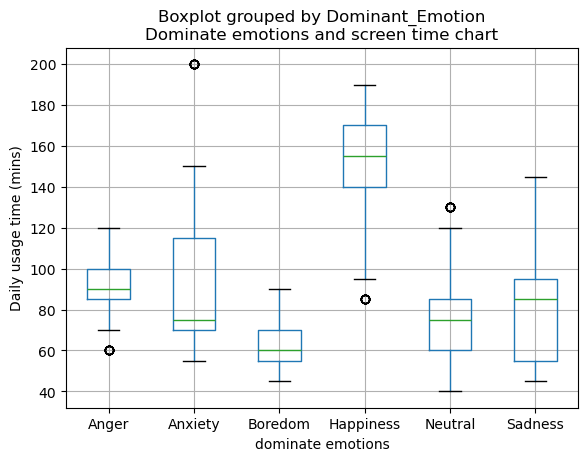

In [37]:
#Creating a box plot for Daily usage time distribution, grouped by Dominant emotions
df.boxplot(column='Daily_Usage_Time (minutes)', by='Dominant_Emotion')
plt.title('Dominate emotions and screen time chart')
plt.ylabel('Daily usage time (mins)')
plt.xlabel('dominate emotions')
plt.show()

The box plot below examines the distribtuion of number of social media likes received per day, grouped by dominant emotions of social media users. From the box plot it can be derived that those whose dominant emotion felt was happiness had the highest mean number of daily likes recieved, at just below 80 likes per day, however the range of likes recieved by those with happiness as their dominant emotion was the greatest compared to the other emotions felt by social media users. Boredom, neutral and sadness dominant emotions were consistent with their means around 20 likes recieved per dau, whilst those experiencing anger and anxiety recieved closer to 40 likes per day. Anxiety, boredom and sadness all experienced two outliers above the upper whisker, whilst the neutral emotion users spread contained 4 outliers. 

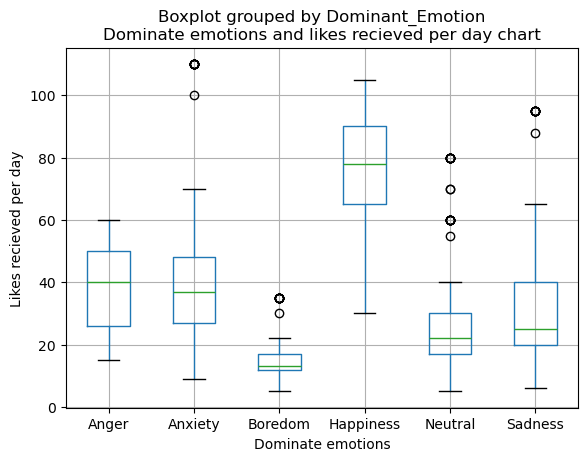

In [40]:
#Creating a box plot for likes recieved per day, grouped by Dominant emotions
df.boxplot(column='Likes_Received_Per_Day', by='Dominant_Emotion')
plt.title('Dominate emotions and likes recieved per day chart')
plt.ylabel('Likes recieved per day')
plt.xlabel('Dominate emotions')
plt.show()

The following two scatter plots depict the correlation between daily usage (Minutes per day using social media) and the number of likes recieved per day, as well as the correlation between likes per day and number of comments per day. In the first scatter plot, displaying the correlation between daily usage and likes recived per day, it can be seen that there is a strong positive correlation between daily social media usage and the number of likes recieved. This exhibits that as the daily usage time of users increases, so too will the number of likes recieved. The two features had a correlation coefficent of 0.94, further demonstrating this correlation.

The second scatter plot exhibits the correlation between likes per day and number of comments per day. From this scatter plot, a strong linear relationship is again explored. The correlation coefficent between these two features was highlighted as being 0.93, which supports this strong positive correlation detailed in the scatter plot.

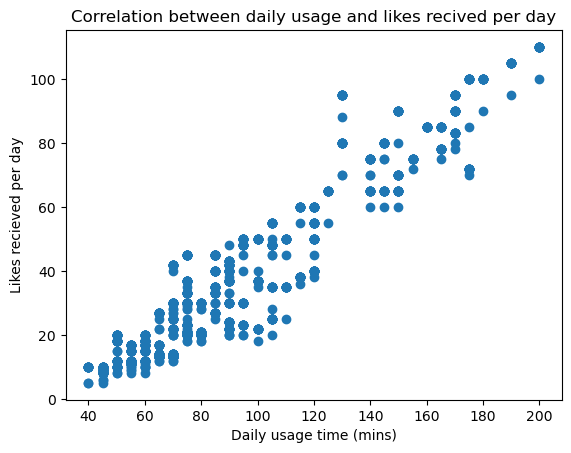

In [43]:
#Creating a scatter plot to describe the correlation between daily usage time and likes recieved per day
plt.scatter(df['Daily_Usage_Time (minutes)'], df['Likes_Received_Per_Day'])
plt.title('Correlation between daily usage and likes recived per day')
plt.xlabel('Daily usage time (mins)')
plt.ylabel('Likes recieved per day')
plt.show()

In [44]:
#Finding correlation coefficent
df['Daily_Usage_Time (minutes)'].corr(df['Likes_Received_Per_Day'])

0.9404267125319986

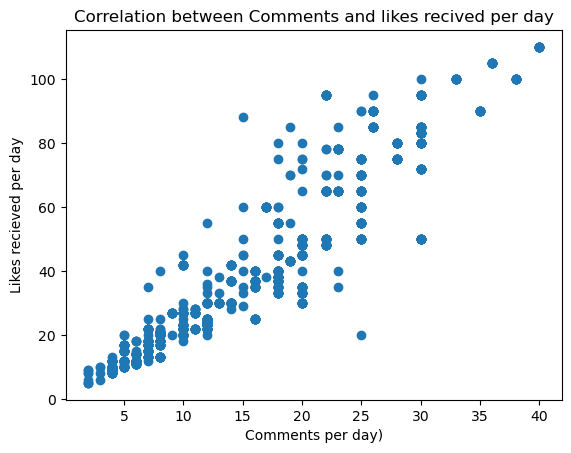

In [46]:
#Creating a scatter plot to describe the correlation between comments and likes recieved per day
plt.scatter(df['Comments_Received_Per_Day'], df['Likes_Received_Per_Day'])
plt.title('Correlation between Comments and likes recived per day')
plt.xlabel('Comments per day)')
plt.ylabel('Likes recieved per day')
plt.show()

In [47]:
#Finding correlation coefficent
df['Comments_Received_Per_Day'].corr(df['Likes_Received_Per_Day'])

0.9319112802897682

#### Key takeaways:
- Average age of data is 27.5 years old
- Younger people tended to have a neutral dominant emotion compared to other ages who experienced a range of dominant emotions
- Instagram was the app of choice, with more messages being sent per day on instagram than any other social media platform
- Strong correlations found between daily usage and messages sent, as well as daily usage and messages/likes recived
- Those who reported happiness tended to spend longer on average on social media and recieve more comments each day on their social media activities


---

## Data Modelling

### Preparring data to be used for modelling

In this section the dataframe will be prepared for modelling. As we are planning to use classification models, our data should be converted to numeric data to allow for KNN and decision tree models to be used to attempt to predict the dominant emotions of individuals based upon their social media usage habbits. We first ensure that all librabries needed to complete data modelling with machine learning are imported, included SKlearn for our KNN and Decision tree classifier models. From SKlearn we also import a wide range of metrics as well as a train test split to allow our data to be split into training and testing datasets as well as to evaulate model performance. The evaulation metrics which were used to analyse the performance of the model were accuracy, recall, precision and f1-score with conufusion matrixs also being produced for model evaulation.

In [54]:
#Importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error 
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

In order to convert our data types to numeric, we will use an encoder to complete One Hot Encoding which a method for converting categorical variables into a binary format. This will be completed to convert our categorical data of the 'Gender' and 'Platforms' columns in our dataframe, so that they are in binary form and can be prosecced by our machine learning models and the categorical features can be used to make preidictions for users dominant emotions.

In [56]:
#Encoding the 'Platform' category to allow for classification models to use data
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_array = encoder.fit_transform(df[['Platform']])
df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Platform']))

print(df_encoded)

      Platform_Facebook  Platform_Instagram  Platform_LinkedIn  \
0                   0.0                 0.0                0.0   
1                   0.0                 0.0                0.0   
2                   0.0                 0.0                0.0   
3                   0.0                 0.0                0.0   
4                   1.0                 0.0                0.0   
...                 ...                 ...                ...   
1096                0.0                 0.0                0.0   
1097                1.0                 0.0                0.0   
1098                0.0                 0.0                0.0   
1099                0.0                 0.0                0.0   
1100                0.0                 0.0                0.0   

      Platform_Snapchat  Platform_Telegram  Platform_Twitter  \
0                   1.0                0.0               0.0   
1                   1.0                0.0               0.0   
2              

In [57]:
#Adding encoded columns to dataframe 
df = pd.concat([df, df_encoded], axis=1)

#Removing original 'Platform' column from the dataframe
df.drop(columns=['Platform'], inplace=True)
df

,User_ID,Age,Gender,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,500,27,Female,120,4.0,40.0,18.0,22.0,Neutral,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,488,21,Non-binary,60,1.0,18.0,7.0,12.0,Neutral,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,776,28,Non-binary,115,3.0,38.0,18.0,27.0,Anxiety,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,869,27,Male,105,3.0,48.0,20.0,28.0,Anxiety,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,573,21,Non-binary,55,3.0,17.0,7.0,12.0,Neutral,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,996,33,Non-binary,85,4.0,35.0,18.0,18.0,Boredom,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1097,997,22,Female,70,1.0,14.0,6.0,10.0,Neutral,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1098,998,35,Male,110,3.0,50.0,25.0,25.0,Happiness,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1099,999,28,Non-binary,60,2.0,18.0,8.0,18.0,Anger,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
#Encoding the 'Gender' category to allow for classification models to use data
encoded_array1 = encoder.fit_transform(df[['Gender']])
df_encoded1 = pd.DataFrame(encoded_array1, columns=encoder.get_feature_names_out(['Gender']))

print(df_encoded1)

      Gender_Female  Gender_Male  Gender_Non-binary
0               1.0          0.0                0.0
1               0.0          0.0                1.0
2               0.0          0.0                1.0
3               0.0          1.0                0.0
4               0.0          0.0                1.0
...             ...          ...                ...
1096            0.0          0.0                1.0
1097            1.0          0.0                0.0
1098            0.0          1.0                0.0
1099            0.0          0.0                1.0
1100            1.0          0.0                0.0

[1101 rows x 3 columns]


In [59]:
#Adding encoded columns to dataframe 
df = pd.concat([df, df_encoded1], axis=1)

#Removing original 'Platform' column from the dataframe
df.drop(columns=['Gender'], inplace=True)
df

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp,Gender_Female,Gender_Male,Gender_Non-binary
0,500,27,120,4.0,40.0,18.0,22.0,Neutral,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,488,21,60,1.0,18.0,7.0,12.0,Neutral,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,776,28,115,3.0,38.0,18.0,27.0,Anxiety,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,869,27,105,3.0,48.0,20.0,28.0,Anxiety,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,573,21,55,3.0,17.0,7.0,12.0,Neutral,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,996,33,85,4.0,35.0,18.0,18.0,Boredom,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1097,997,22,70,1.0,14.0,6.0,10.0,Neutral,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1098,998,35,110,3.0,50.0,25.0,25.0,Happiness,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1099,999,28,60,2.0,18.0,8.0,18.0,Anger,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Modelling

##### Splitting data into training and testing sets

Now that the categorical data has been encoded through one hot encoding, the data is now ready to be split into testing and training datasets. This is completed so that our machine learning models performance can be evaluated. We have chosen a 80-20 split on this data meaning that 80% of the dataset will be used for training the model and 20% of the data will be used for testing the models performance through our evaultion metrics. The models will be evaulted based upon the metrics of accuracy, recall, precision and f1-score. Accuracy measures the proportion of correctly classified instances out of the total instances, providing an overall assessment of model performance. Recall, also known as sensitivity, evaluates the proportion of actual positive instances correctly identified by the model, making it crucial for scenarios where missing positives is costly. Precision, on the other hand, measures the proportion of predicted positive instances that are actually positive, helping to assess the reliability of positive predictions. The F1-score balances precision and recall by calculating their harmonic mean, making it useful when there is an uneven class distribution or when both false positives and false negatives are important.

In [63]:
x1 = df.drop('Dominant_Emotion', axis=1)  # Features
y1 = df['Dominant_Emotion'] # Target variable

In [64]:
#Creating training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=1)

##### KNN Model

The first model which will be used is KNN through the SKlearn library. Now that the data has been split into testing and training sets, we can use the KNN classification model to attempt to predict a social media users dominant emotion based off their social media usage habits. It was found the the optimal number of n (nearest-neighbours) was found to be 5. This was found using the elbow method on the graph below, and marks the point at which the accuracy of the KNN is maximised over other values of n.   

In [67]:
#Creating and fitting KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

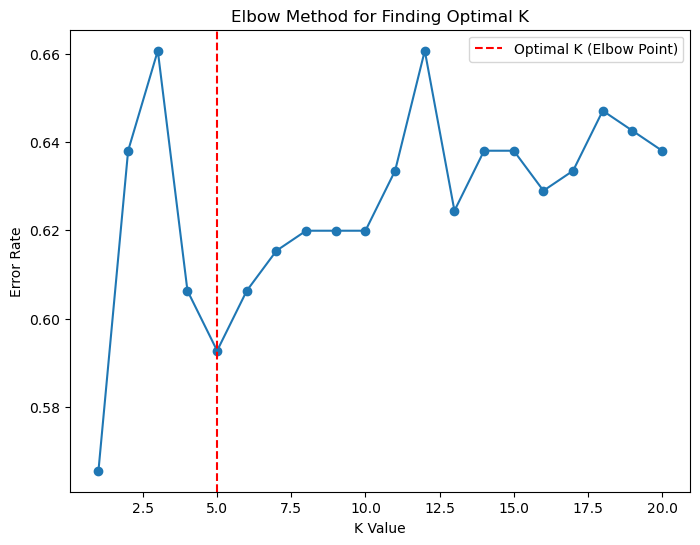

In [68]:
#Finding optimal value of N and displaying elbow method graph
k_values = range(1, 21)
error_rates = []

for k in k_values:
    knn1 = KNeighborsClassifier(n_neighbors=k)
    knn1.fit(X_train, y_train)
    y_pred = knn1.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)

plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Finding Optimal K')
plt.axvline(x=5, linestyle='--', color='red', label="Optimal K (Elbow Point)")
plt.legend()
plt.show()

Overall, the performance of the KNN model with n as 5 performed relatively poorly in prediciting the dominant emotion of an indidivdual based upon their social media usage habits. As detailed in the confusion matrix, although the model did make many correct predictions, depicted on the diagonal central, there were still many predictions which were incorrect. This is further proven by the classification report. As a whole, the model scored 0.41 on accuracy, meaning that the model only correctly predicted 41% of social media users dominant emotions. For the precision metric, moreover, the model performed poorly with a macro precision average of 0.36 and a weighted average precision of 0.39. The recall metric and f1-score metrics were also poorly performing for the model, with a 0.4 macro and 0.41 weighted average for recall, and a 0.37 macro and 0.39 weighted average f1-score, emphasing that the model was poorly performing. Full evaultion metric breakdowns can be seen below.

In [70]:
#Testing our model and printing confusion matrix
predicted = knn.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted))

Confusion Matrix:
 [[ 8  6  0  1  4  8]
 [ 3 13 13  7  0  2]
 [ 0  4 16  0  5  0]
 [ 6  2  0 33  5  0]
 [10  5 10  3 19  3]
 [11  3  6  6  8  1]]


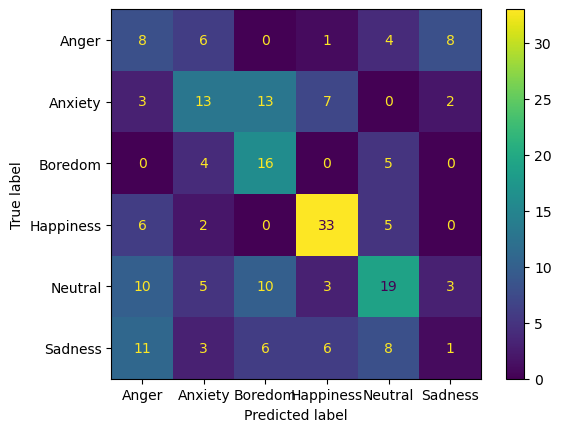

In [71]:
#Printing visual representation of confusion matrix
cm = confusion_matrix(y_test, predicted, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()
plt.show()

In [72]:
#Printing classification model
print("\nClassification Report:\n", classification_report(y_test, predicted, zero_division=0))


Classification Report:
               precision    recall  f1-score   support

       Anger       0.21      0.30      0.25        27
     Anxiety       0.39      0.34      0.37        38
     Boredom       0.36      0.64      0.46        25
   Happiness       0.66      0.72      0.69        46
     Neutral       0.46      0.38      0.42        50
     Sadness       0.07      0.03      0.04        35

    accuracy                           0.41       221
   macro avg       0.36      0.40      0.37       221
weighted avg       0.39      0.41      0.39       221



#### Decision Tree model

The second classification model which has been used to predict social media users dominant emotions is a Decision tree model. Through paramter tuning and a grid search, it was found that the optimal paramters are as follows: the criterion was optimal as 'gini', the maximum depth was optimised at 15, the minimum samples leaf optimum was found to be 1 and also the minimum samples split was optimal at 2. These paramters were then included in the decision tree classifier to ensure optimal performance and results by the model.

In [75]:
#GridSerach to find optimal parameters for decision tree model
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy'],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [76]:
#Creating decision tree model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=15,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=1)


In [77]:
#Fitting model and making predictions
dt.fit(X_train, y_train)
y_pre = dt.predict(X_test)

The performance of the decision tree classifier model outperformed the KNN classification model and was very well performing in prediciting social media users dominant emotions. As detailed in the confusion matrix, the model correctly predicited a majority of the dominant emotions of social media users in the test data set. This is further demonstarted by the classification report. As a whole, the model scored 0.95 on accuracy, meaning that the model correctly predicted 95% of social media users dominant emotions. For the precision metric, moreover, the model performed proficently with a macro precision average of 0.95 and a weighted average precision of 0.96. The recall metric and f1-score metrics were also well performing for the model, with a 0.95 macro and 0.95 weighted average for recall, and a 0.95 macro and 0.95 weighted average f1-score, emphasing that the model was performing well. Ultimately, the decision tree classifier model outperformed the KNN model in all of the evaulation metrics. Full evaultion metric breakdowns can be seen below.

In [79]:
#Printing confusion matrix
cm = confusion_matrix(y_test, y_pre)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[24  1  1  0  0  1]
 [ 0 36  0  0  2  0]
 [ 0  0 24  0  0  1]
 [ 0  0  0 46  0  0]
 [ 0  0  0  0 49  1]
 [ 0  0  2  1  0 32]]


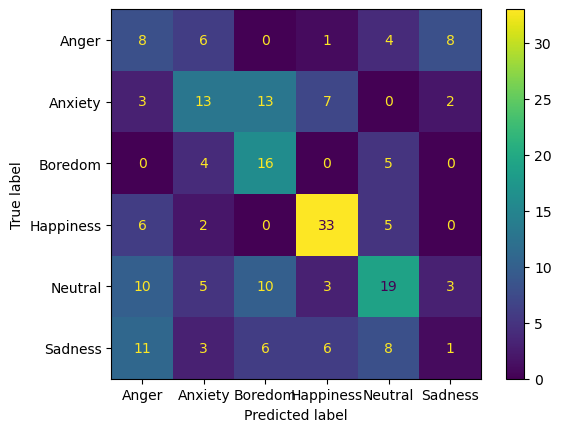

In [80]:
#Printing visual representation of confusion matrix
cm = confusion_matrix(y_test, predicted, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp.plot()
plt.show()

In [81]:
#Printing classification model
print("\nClassification Report:\n", classification_report(y_test, y_pre, zero_division=0))


Classification Report:
               precision    recall  f1-score   support

       Anger       1.00      0.89      0.94        27
     Anxiety       0.97      0.95      0.96        38
     Boredom       0.89      0.96      0.92        25
   Happiness       0.98      1.00      0.99        46
     Neutral       0.96      0.98      0.97        50
     Sadness       0.91      0.91      0.91        35

    accuracy                           0.95       221
   macro avg       0.95      0.95      0.95       221
weighted avg       0.96      0.95      0.95       221



#### Prediciting new social media users dominant emotions

In this section, we have used both of our models to attempt to predict the dominant emotions of new social media users not in the dataset. The first new user is a 25 year old male who primarily uses Facebook as his platform, with a daily usage time of 180 minutes, 3 posts per day, 50 likes recived, 10 comments recieved and 30 messages sent per day. Both the KNN and decision tree model predicted that this users dominate emotion would be 'Happiness'. Our second new social media user is a 34 year old female who primarily uses Snapchat as her platform, with a daily usage time of 95 minutes, 7 posts per day, 30 likes recived, 15 comments recieved and 50 messages sent per day. For this new user, our Decision tree model predicted 'Sadness', whilst our KNN model predicted 'Anxiety' as the dominant emotion which may be felt by this social media user based off their social media usage.

In [84]:
#Creating new user for model to predict dominant emotion based on their social media usage 
data = {
    "User_ID": [1001],  # Example user ID
    "Age": [25],  # Example age
    "Daily_Usage_Time (minutes)": [180],  # Example usage time
    "Posts_Per_Day": [3],  # Example number of posts
    "Likes_Received_Per_Day": [50],  # Example likes received
    "Comments_Received_Per_Day": [10],  # Example comments received
    "Messages_Sent_Per_Day": [30],  # Example messages sent
    "Platform_Facebook": [1],  # User active on Facebook
    "Platform_Instagram": [0],  # User active on Instagram
    "Platform_LinkedIn": [0],  # User not active on LinkedIn
    "Platform_Snapchat": [0],  # User not active on Snapchat
    "Platform_Telegram": [0],  # User active on Telegram
    "Platform_Twitter": [0],  # User not active on Twitter
    "Platform_Whatsapp": [0],  # User active on WhatsApp
    "Gender_Female": [0],  # Not female
    "Gender_Male": [1],  # Male
    "Gender_Non-binary": [0]  # Not non-binary
}

In [85]:
#Creating new dataframe with the test user
test_df = pd.DataFrame(data)

#Using decision tree model to predict new users dominant emotion
new_pred = dt.predict(test_df)
print('The Decision tree model predicts this individuals dominate emotion will be:', new_pred)

The Decision tree model predicts this individuals dominate emotion will be: ['Happiness']


In [86]:
#Using KNN model to predict new users dominant emotion
knn_new = knn.predict(test_df)
print('The KNN model predicts this individuals dominate emotion will be:', knn_new)

The KNN model predicts this individuals dominate emotion will be: ['Happiness']


In [87]:
#Creating new user for model to predict dominant emotion based on their social media usage 
data1 = {
    "User_ID": [1002],  # Example user ID
    "Age": [34],  # Example age
    "Daily_Usage_Time (minutes)": [95],  # Example usage time
    "Posts_Per_Day": [7],  # Example number of posts
    "Likes_Received_Per_Day": [30],  # Example likes received
    "Comments_Received_Per_Day": [15],  # Example comments received
    "Messages_Sent_Per_Day": [50],  # Example messages sent
    "Platform_Facebook": [0],  # User active on Facebook
    "Platform_Instagram": [0],  # User active on Instagram
    "Platform_LinkedIn": [0],  # User not active on LinkedIn
    "Platform_Snapchat": [1],  # User not active on Snapchat
    "Platform_Telegram": [0],  # User active on Telegram
    "Platform_Twitter": [0],  # User not active on Twitter
    "Platform_Whatsapp": [0],  # User active on WhatsApp
    "Gender_Female": [1],  # Not female
    "Gender_Male": [0],  # Male
    "Gender_Non-binary": [0]  # Not non-binary
}

In [88]:
#Creating new dataframe with the test user
test_df1 = pd.DataFrame(data1)

#Using decision tree model to predict new users dominant emotion
new_pred = dt.predict(test_df1)
print('The Decision tree model predicts this individuals dominate emotion will be:', new_pred)

The Decision tree model predicts this individuals dominate emotion will be: ['Sadness']


In [89]:
#Using KNN model to predict new users dominant emotion
knn_new = knn.predict(test_df1)
print('The KNN model predicts this individuals dominate emotion will be:', knn_new)

The KNN model predicts this individuals dominate emotion will be: ['Anxiety']
